In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import cartopy as cr
import cartopy.feature as cf
import cartopy.crs as ccrs

import matplotlib.pyplot as plt

time series (TN90p)

c:\Users\Akshit Nanda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


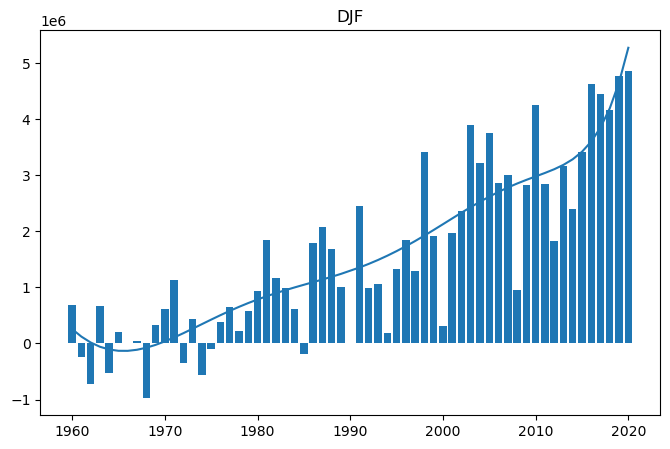

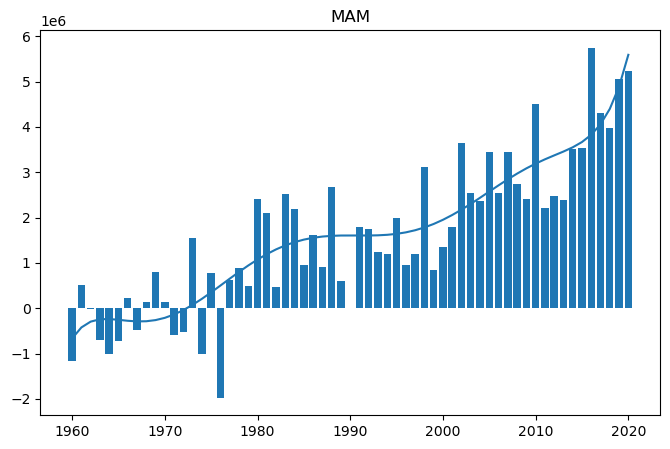

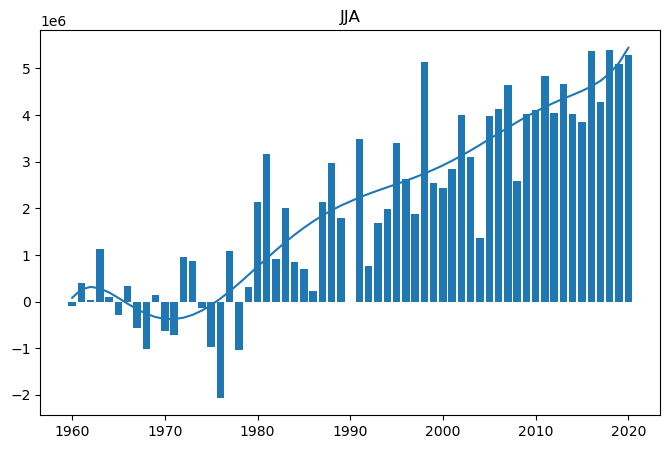

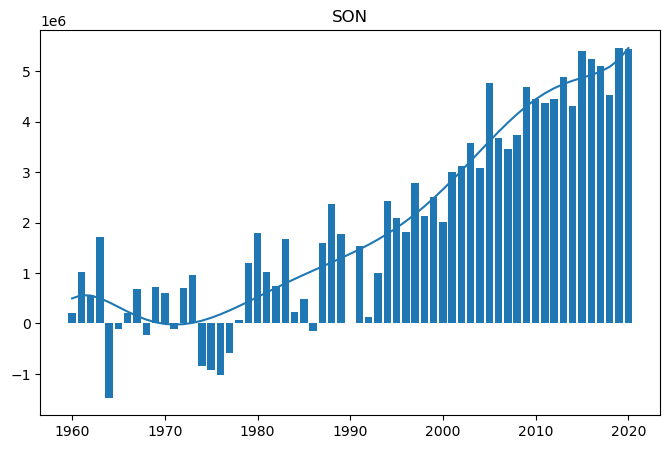

In [3]:
month = ['djf','mam','jja','son']
year = []
for i in range (1960,2021):
    year.append(i)
year.remove(1990)

for i in month:
    data = xr.open_dataset(i + '.tn90p.hist.nc')
    data = np.mean(data['warm_nights_percent_wrt_90th_percentile_of_reference_period'],axis=(1,2))
    #data = data.to_numpy()
    #data = data[:,0,0]
    data = list(data)
    data.pop(np.argmin(data))

    plt.figure(figsize=(8,5))
    plt.bar(year,data)
    p = np.polyfit(year,data,21)
    trendline = np.polyval(p,year)
    plt.plot(year,trendline)
    plt.title(i.upper())

climatology (TN90p)

c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_righ

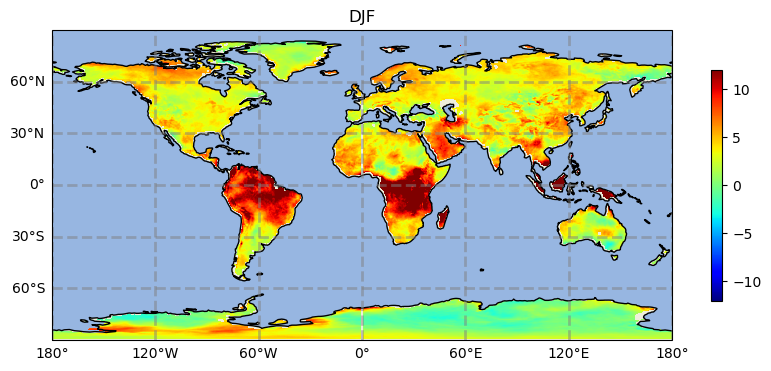

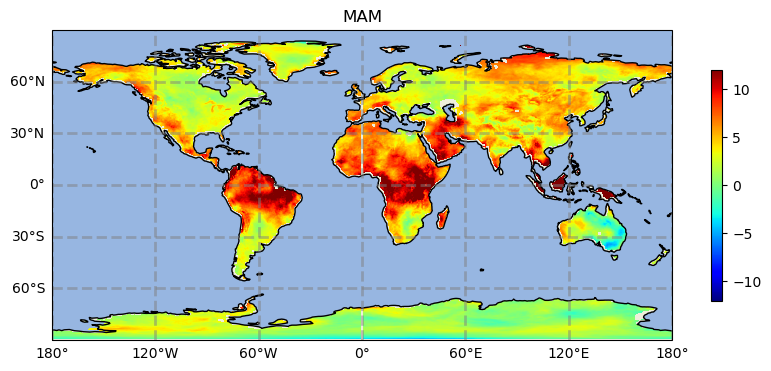

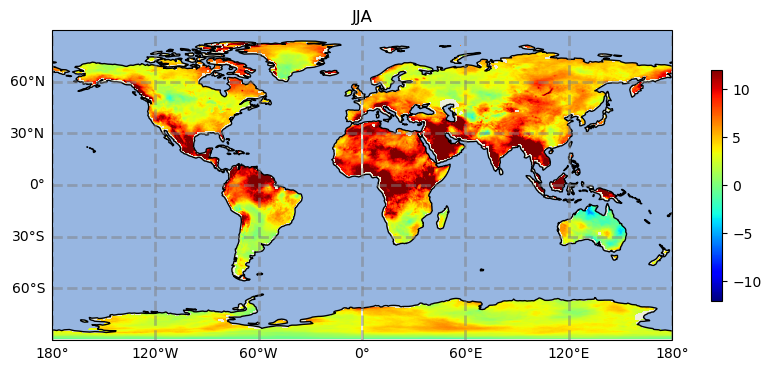

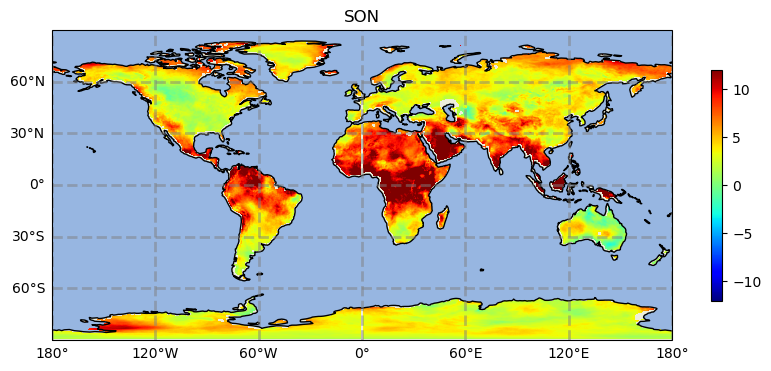

In [6]:
month = ['djf','mam','jja','son']
for i in month:
    df = xr.open_dataset('cl.tn90p.'+i+'.nc')
    df = np.mean(df['warm_nights_percent_wrt_90th_percentile_of_reference_period'],axis=(0))
    lon = df.longitude; lat = df.latitude
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

    mp = ax.imshow(df,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='upper',vmin=-12,vmax=12)

    ax.add_feature(cf.LAND)
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.OCEAN)

    cbar = fig.colorbar(mp, shrink=0.3)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False

    plt.title(i.upper())